In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

class CubicSplineInterpolation:
    n = 0
    x = np.array([])
    y = np.array([])
    h = np.array([])
    q = np.array([])

    def fit(self, x, y):
        self.n = x.size - 1
        self.x = x
        self.y = y

        self.h = np.array([x[i + 1] - x[i] for i in range(0, self.n)])
        self.q = np.zeros(self.n + 1)

        matrixA = np.zeros((3, self.n - 1))    # matrixA is stored using diagonal ordered form(matrixA[1 + i - j][j] == a[i][j])
        b = np.zeros(self.n - 1)

        matrixA[1 + 0 - 0][0] = (self.h[0] + self.h[1]) / 3                           # a[0][0]
        matrixA[1 + 0 - 1][1] = self.h[1] / 6                                         # a[0][1]
        b[0] = (y[2] - y[1]) / self.h[1] - (y[1] - y[0]) / self.h[0]

        for i in range(1, self.n - 2):
            matrixA[1 + i - (i - 1)][i - 1] = self.h[i] / 6                           # a[i][i-1]
            matrixA[1 + i -  i     ][i    ] = (self.h[i] + self.h[i + 1]) / 3         # a[i][i]
            matrixA[1 + i - (i + 1)][i + 1] = self.h[i + 1] / 6                       # a[i][i+1]

            b[i] = (y[i + 2] - y[i + 1]) / self.h[i + 1] - (y[i + 1] - y[i]) / self.h[i]

        matrixA[1 + self.n - 2 - (self.n - 3)][self.n - 3] = self.h[self.n - 2] / 6   # a[n-2][n-3]
        matrixA[1 + self.n - 2 - (self.n - 2)][self.n - 2] = (self.h[self.n - 2] +    # a[n-2][n-2]
                                                              self.h[self.n - 1]) / 3
        b[self.n - 2] = (y[self.n] - y[self.n - 1]) / self.h[self.n - 1] - \
                        (y[self.n - 1] - y[self.n - 2]) / self.h[self.n - 2]

        self.q[1:-1] = solve_banded((1, 1), matrixA, b)

    def predict(self, X):
        res = []
        i = 0

        for x in X:
            while i + 1 <= self.n and self.x[i + 1] < x:
                i += 1

            y = self.q[i] * (self.x[i + 1] - x) ** 3 / (6 * self.h[i]) + \
                self.q[i + 1] * (x - self.x[i]) ** 3 / (6 * self.h[i]) + \
                (self.y[i] / self.h[i] - self.q[i] * self.h[i] / 6) * (self.x[i + 1] - x) + \
                (self.y[i + 1] / self.h[i] - self.q[i + 1] * self.h[i] / 6) * (x - self.x[i])
            res.append(y)
        return np.array(res)

In [191]:
def f(x):
    return np.sin(x) * np.sin(x)

In [312]:
solver = CubicSplineInterpolation()

n = 5
a,b = 0, 1

x = np.zeros(n)
x[0] = a
x[-1] = b
x[1:-1] = np.random.uniform(a, b, n - 2)
x.sort()

solver.fit(x, f(x))

x = np.linspace(0, 1, 100)
y = solver.predict(x)

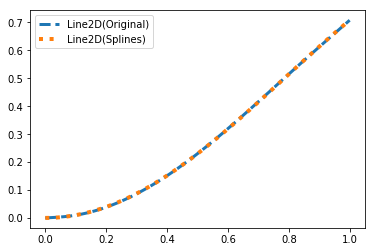

In [320]:
pred, = plt.plot(x, y, label='Splines', linestyle='--', linewidth=3)
x = np.linspace(0, 1, 100)
orig, = plt.plot(x, f(x), label='Original', linestyle=':', linewidth=4)

plt.legend([orig, pred])
plt.show()

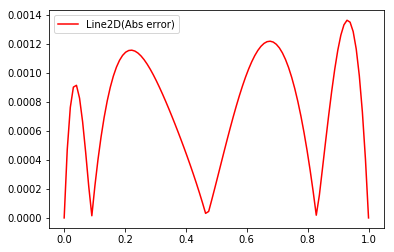

In [321]:
err, = plt.plot(x, np.abs(y - f(x)), color='red', label='Abs error')
plt.legend([err])
plt.show()
